In [407]:
# Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from parse import preprocess

In [408]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [409]:
# Pre-parse the dataset
data = preprocess("rawfile_blood.csv")

robust          368
prefrail_mci    268
prefrail        250
mci             142
frail_mci        86
frail             9
Name: condition, dtype: int64

####################################################################
Number of Rows of Dataframe:
1123
Number of Columns of Dataframe:
59

####################################################################
Threshold for number of NULLs in a column: 0.1095
Number of Columns before Parsing for Too Many NULLs in a column:
59
Number of Columns after Parsing for Too Many NULLs in a column:
51

Columns Removed:
B1_b5
B4_a1
B4_a3
B4_a4
B4_a6
B4_b1
B4_b3
B5_a1

####################################################################
Number of Columns after dropping A1_2, B1_b4, B2_c3, B4_b2 for inconsistent data types:
47

####################################################################
Number of Rows before Parsing NULLs in data:
1123
Number of Rows after Parsing NULLs in data:
1015


In [410]:
data.columns

Index(['mtag', 'condition', 'A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6'],
      dtype='object')

In [411]:
y = data['condition']

features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']

X = data[features]

In [412]:
# X = MinMaxScaler().fit_transform(X)

<AxesSubplot:xlabel='B1_b1'>

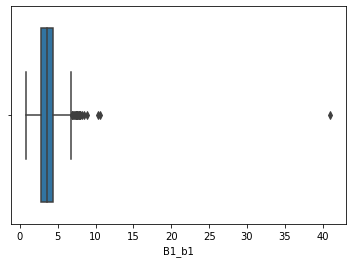

In [413]:
dummy_df = pd.DataFrame(X)

dummy_df.columns = features

# Use top features from RFC Feature Importance

best_features = ['B1_b1', 'B1_a', 'A3_1', 'A1_1', 'B5_a2', 'B1_a1', 'B2_a4', 'B2_a3', 'B2_d5']

sns.boxplot(x=dummy_df[best_features[0]])

<AxesSubplot:xlabel='B1_a'>

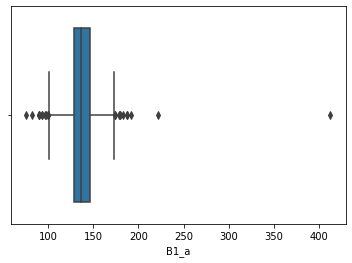

In [414]:
sns.boxplot(x=dummy_df[best_features[1]])

<AxesSubplot:xlabel='A3_1'>

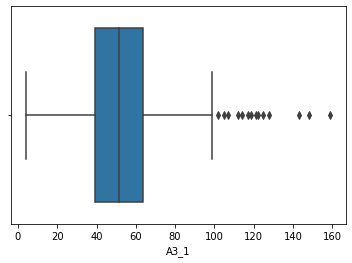

In [415]:
sns.boxplot(x=dummy_df[best_features[2]])

<AxesSubplot:xlabel='A1_1'>

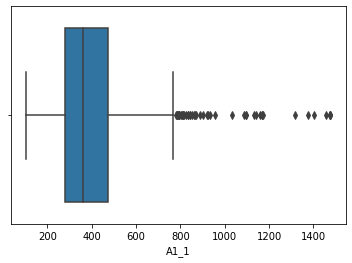

In [416]:
sns.boxplot(x=dummy_df[best_features[3]])

<AxesSubplot:xlabel='B5_a2'>

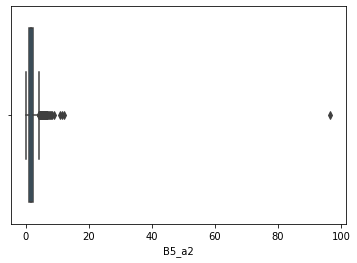

In [417]:
sns.boxplot(x=dummy_df[best_features[4]])

<AxesSubplot:xlabel='B1_a1'>

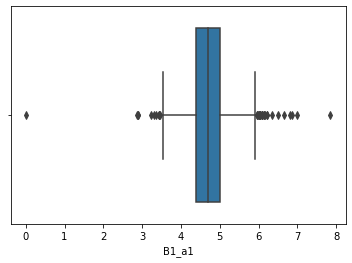

In [418]:
sns.boxplot(x=dummy_df[best_features[5]])

<AxesSubplot:xlabel='B2_a4'>

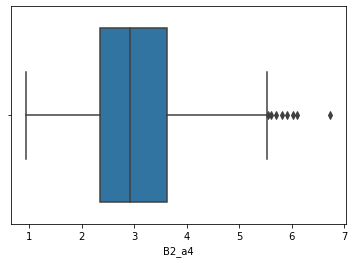

In [419]:
sns.boxplot(x=dummy_df[best_features[6]])

<AxesSubplot:xlabel='B2_a3'>

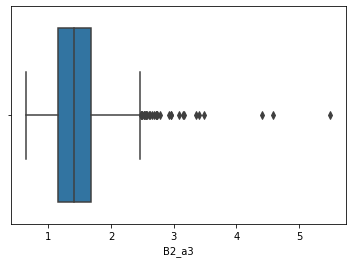

In [420]:
sns.boxplot(x=dummy_df[best_features[7]])

<AxesSubplot:xlabel='B2_d5'>

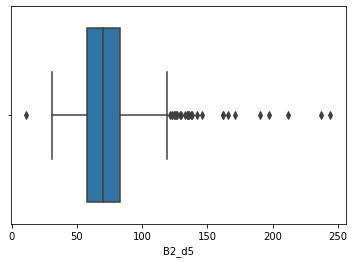

In [421]:
sns.boxplot(x=dummy_df[best_features[8]])

In [422]:
Q1 = dummy_df.quantile(0.25)
Q3 = dummy_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

A1_1     194.500
A2_1       6.000
A3_1      24.350
B1_a      18.000
B1_a1      0.610
B1_a2      0.050
B1_a3      6.000
B1_a4      3.000
B1_a5     16.000
B1_a6      1.200
B1_b       2.400
B1_b1      1.600
B1_b2      0.900
B1_b3      0.200
B1_c      71.500
B1_d       1.200
B2_a1      1.500
B2_a2      0.715
B2_a3      0.520
B2_a4      1.270
B2_a5      1.300
B2_b1      2.000
B2_b2      0.500
B2_b3      3.000
B2_c1      1.950
B2_c2     31.000
B2_c4      0.120
B2_c5      0.120
B2_c6      0.100
B2_c7      0.200
B2_d1      5.000
B2_d2      3.000
B2_d3      5.000
B2_d4      0.200
B2_d5     25.000
B2_d6      6.000
B2_d7     16.000
B2_d8      7.000
B2_d9     11.000
B3         3.700
B4_a2      1.000
B4_a5      0.010
B5_a2      1.285
B5_a3      0.600
B6         0.800
dtype: float64


In [423]:
print((dummy_df < (Q1 - 1.5 * IQR)) |(dummy_df > (Q3 + 1.5 * IQR)))

       A1_1   A2_1   A3_1   B1_a  B1_a1  B1_a2  B1_a3  B1_a4  B1_a5  B1_a6  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1010  False  False  False  False  False  False  False  False  False  False   
1011  False  False  False  False  False  False  False  False  False  False   
1012  False  False  False  False  False  False  False  False  False  False   
1013  False  False  False  False  False  False  False  False  False  False   
1014  False  False  False  False  False  False  False  False  False  False   

      ...  B2_d6  B2_d7  B2_d8  B2_d9     B3  B4_a2  B4_a5  B5_

In [424]:
dummy_df_out = dummy_df[~((dummy_df < (Q1 - 1.5 * IQR)) |(dummy_df > (Q3 + 1.5 * IQR))).any(axis=1)]
dummy_df_out.shape

(350, 45)

In [425]:
dummy_df_out

,A1_1,A2_1,A3_1,B1_a,B1_a1,B1_a2,B1_a3,B1_a4,B1_a5,B1_a6,...,B2_d6,B2_d7,B2_d8,B2_d9,B3,B4_a2,B4_a5,B5_a2,B5_a3,B6
0,196,24,46.5,121,3.93,0.37,95,31,324,13.3,...,7,12,13,6,0.2,6.0,1.011,1.14,4.1,5.9
2,441,20,76.8,105,4.54,0.41,90,30,330,14.0,...,5,16,19,15,1.4,7.0,1.023,2.14,4.0,6.4
3,265,16,47.2,122,4.53,0.39,86,27,313,14.9,...,8,24,19,21,2.1,5.5,1.012,1.06,4.7,6.1
7,241,20,33.5,150,5.25,0.46,87,29,328,12.8,...,10,21,22,17,1.3,7.0,1.010,0.69,4.7,5.9
15,268,16,18.5,116,4.27,0.35,82,27,331,14.6,...,8,51,20,15,0.4,6.5,1.006,1.74,3.8,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,365,28,63.0,144,5.01,0.43,86,29,334,13.6,...,13,52,18,20,1.0,6.0,1.011,1.10,5.1,5.6
1010,220,19,67.5,138,4.66,0.42,91,30,325,14.1,...,20,10,17,8,6.6,7.0,1.015,1.29,4.5,6.2
1011,334,18,51.0,139,4.63,0.42,91,30,330,15.6,...,16,22,35,40,1.0,6.0,1.015,1.88,3.9,5.6
1013,393,18,43.1,136,4.57,0.43,94,30,316,12.5,...,13,11,22,23,0.7,7.0,1.009,0.92,4.1,6.0


In [426]:
y

0        frail
1        frail
2        frail
3        frail
4        frail
         ...  
1010    robust
1011    robust
1012    robust
1013    robust
1014    robust
Name: condition, Length: 1015, dtype: object

In [427]:
df_test = dummy_df_out.join(y)

df_test = df_test[df_test.condition != 'frail']
df_test = df_test.reset_index(drop=True)

y = df_test['condition']

features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']

X = df_test[features]

# X = StandardScaler().fit_transform(X)

In [428]:
# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({'robust': 140, 'prefrail_mci': 80, 'prefrail': 77, 'mci': 40, 'frail_mci': 10})


In [429]:
# Transform the dataset using SMOTE
# oversample = SMOTE(k_neighbors=2)
# X, y = oversample.fit_resample(X, y)

# Summarise the new class distribution
# counter = Counter(y)
# print(counter)

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Random Forest Classifier

rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

K-Nearest Neigbors: 0.295
Random Forest Classifier: 0.424
LogitBoost Classifier: 0.388


In [381]:
# Calculating for KNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

# Calculating for RFC
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for KNN:

0.29496 

[[ 0  1  0  1  3]
 [ 0  2  3  6  4]
 [ 0  9  5  6 11]
 [ 1  3  2  9 18]
 [ 3  4  8 15 25]] 

              precision    recall  f1-score   support

   frail_mci       0.00      0.00      0.00         5
         mci       0.11      0.13      0.12        15
    prefrail       0.28      0.16      0.20        31
prefrail_mci       0.24      0.27      0.26        33
      robust       0.41      0.45      0.43        55

    accuracy                           0.29       139
   macro avg       0.21      0.20      0.20       139
weighted avg       0.29      0.29      0.29       139

Performance Metrics for RFC:

0.42446 

[[ 0  0  0  1  4]
 [ 0  1  1  1 12]
 [ 0  0  5  3 23]
 [ 0  0  6 10 17]
 [ 0  0  7  5 43]] 

              precision    recall  f1-score   support

   frail_mci       0.00      0.00      0.00         5
         mci       1.00      0.07      0.12        15
    prefrail       0.26      0.16      0.20        31
prefrail_mci       0.50     

C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shahi\anaconda3\envs\FYP\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [382]:
# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

K-Nearest Neighbors: 0.33 accuracy with a standard deviation of 0.06
Random Forest Classifier: 0.40 accuracy with a standard deviation of 0.06
